In [4]:
!pip install tensorflow-hub
!pip install tensorflow-text --user --no-warn-script-location
!pip install tensorflow

In [5]:
import tensorflow_hub as hub
import tensorflow_text as text

In [6]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [25]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [26]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [21]:
import tensorflow as tf
import tensorflow_hub as hub

bert_preprocess_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

text_test = ["Nlp is one great technology to learn", "Good will hunting is a great movie to watch"]

# Preprocess the text using the BERT pre-processing layer
preprocessed_inputs = bert_preprocess_model(text_test)

# Create input tensors for the BERT model
input_word_ids = preprocessed_inputs["input_word_ids"]
input_mask = preprocessed_inputs["input_mask"]
input_type_ids = preprocessed_inputs["input_type_ids"]
input_dict = {
    "input_word_ids": input_word_ids,
    "input_mask": input_mask,
    "input_type_ids": input_type_ids
}

# Load the BERT model
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3")

# Get the BERT outputs
bert_outputs = bert_model(input_dict)

# Print the shape of the outputs
print(bert_outputs["sequence_output"].shape) # (2, max_seq_length, 768)


(2, 128, 768)


In [33]:
preprocessed_inputs["input_word_ids"]

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101, 17953,  2361,  2003,  2028,  2307,  2974,  2000,  4553,
          102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [34]:
bert_outputs.keys()

dict_keys(['encoder_outputs', 'sequence_output', 'pooled_output', 'default'])

# "pooled_output" gives the total no.of embeddings for both the sentences.

In [35]:
bert_outputs["pooled_output"]

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8540213 , -0.46042633, -0.76998186, ..., -0.78491944,
        -0.6894188 ,  0.7915494 ],
       [-0.87586594, -0.40555277, -0.60453767, ..., -0.41559428,
        -0.67106885,  0.8672116 ]], dtype=float32)>

# sequence_output gives the padding for both the sentences and also the total embeddings for both the sentences.

In [43]:
bert_outputs["sequence_output"]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 3.46683450e-02, -1.60916567e-01,  1.65195078e-01, ...,
         -2.60871738e-01,  3.77920181e-01,  3.91738176e-01],
        [ 4.18305904e-01, -8.48655164e-01,  2.96657830e-01, ...,
         -3.74103904e-01,  1.29308784e+00,  7.49176323e-01],
        [-1.55866951e-01, -1.32427111e-01,  6.75086796e-01, ...,
         -7.67640948e-01, -3.44011843e-01,  5.69236130e-02],
        ...,
        [ 2.10868269e-01, -2.36056805e-01,  4.13522542e-01, ...,
          1.42456025e-01, -9.75012779e-04,  3.27448756e-01],
        [ 3.04686517e-01, -2.20876038e-01,  4.32537794e-01, ...,
          9.05925557e-02, -1.26229540e-01,  2.46898726e-01],
        [ 2.27507800e-01, -2.26962715e-01,  4.32026565e-01, ...,
          1.41792938e-01, -6.98547438e-02,  2.49755621e-01]],

       [[ 2.63880283e-01, -6.83251396e-02,  1.19080976e-01, ...,
         -2.86498249e-01,  2.87599206e-01,  1.71320483e-01],
        [-5.28914452e-01, -7.80889541e-02,  1.76

# "encoder_outputs" gives the number of encoder layers that are present depending on the model we are using.

In [44]:
len(bert_outputs["encoder_outputs"])

12

# Email classification.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"D:\data_sets\spam.csv")

In [3]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [8]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

# Downsizing the data.

# Seperating the spam and ham data in to seperate data frames.

# spam.

In [18]:
data_spam = data[data["Category"] == "spam"]

In [19]:
data_spam.shape

(747, 2)

# ham.

In [20]:
data_ham = data[data["Category"] == "ham"]

In [21]:
data_ham.shape

(4825, 2)

# downsizing the ham emails to 747.

In [24]:
data_ham_downsize = data_ham.sample(data_spam.shape[0])

In [25]:
data_ham_downsize.shape

(747, 2)

In [28]:
data_balanced = pd.concat([data_spam , data_ham_downsize])
data_balanced

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
569,ham,Love it! Daddy will make you scream with pleas...
5238,ham,Yeah I can still give you a ride
4698,ham,"Okey dokey, i‘ll be over in a bit just sorting..."
4342,ham,Ü all write or wat..


In [30]:
data_balanced["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

# Now the data set is balanced to proceed further.

In [31]:
data_balanced["spam"] = data_balanced["Category"].apply(lambda x: 1 if x == "spam" else 0)

In [35]:
data_balanced.sample(10)

,Category,Message,spam
1652,ham,I wan but too early lei... Me outside now wun ...,0
1134,ham,"As I entered my cabin my PA said, '' Happy B'd...",0
2705,spam,FreeMsg: Fancy a flirt? Reply DATE now & join ...,1
4495,ham,Man this bus is so so so slow. I think you're ...,0
1674,spam,Monthly password for wap. mobsi.com is 391784....,1
4183,spam,Urgent! Please call 0906346330. Your ABTA comp...,1
4940,ham,Tomarrow i want to got to court. At &lt;DECIM...,0
4517,spam,Congrats! 2 mobile 3G Videophones R yours. cal...,1
1452,ham,Ya! when are ü taking ure practical lessons? I...,0
4978,ham,"A boy was late 2 home. His father: ""POWER OF F...",0


In [36]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(data_balanced["Message"] , data_balanced["spam"] , stratify = data_balanced["spam"])

In [45]:
print(x_train.head(2))
print(x_train.shape)

3002    This message is free. Welcome to the new & imp...
3850                                     U in town alone?
Name: Message, dtype: object
(1120,)


In [44]:
print(x_test.head(2))
print(x_test.shape)

3792    Twinks, bears, scallies, skins and jocks are c...
415     100 dating service cal;l 09064012103 box334sk38ch
Name: Message, dtype: object
(374,)


In [46]:
print(y_train.head(2))
print(y_train.shape)

3002    1
3850    0
Name: spam, dtype: int64
(1120,)


In [47]:
print(y_test.head(2))
print(y_test.shape)

3792    1
415     1
Name: spam, dtype: int64
(374,)


In [52]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [50]:
import tensorflow_hub as hub
import tensorflow_text as text

In [54]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [55]:
bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

In [56]:
def get_sentence_embeddings(sentences):
    
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)["pooled_output"]

get_sentence_embeddings([
    "You have won a lottery of 20000$. Hurry up and fill the details to avail it." , 
    "Hello CK are you willing to go for a cricket match this sunday?"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.72585726, -0.46161893, -0.92291164, ..., -0.84089357,
        -0.66009355,  0.8239986 ],
       [-0.8164499 , -0.43955788, -0.82793546, ..., -0.7807128 ,
        -0.6120526 ,  0.88442504]], dtype=float32)>

In [68]:
# Bert layers

text_input = tf.keras.layers.Input(shape = () , dtype = tf.string , name = "text")

preprocessed_text = bert_preprocess(text_input)

outputs_bert = bert_encoder(preprocessed_text)

# Neural network layers

# Dropout helps with overfitting

l = tf.keras.layers.Dropout(0.1 , name = "dropout")(outputs_bert["pooled_output"])

l = tf.keras.layers.Dense(1 , activation = "sigmoid" , name = "output")(l)

# Constructing final model

model = tf.keras.Model(inputs = [text_input] , outputs = [l])

In [69]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [70]:
Metrics = [
    tf.keras.metrics.BinaryAccuracy(name = "accuracy") , 
    tf.keras.metrics.Precision(name = "precision") , 
    tf.keras.metrics.Recall(name = "recall")
]

model.compile(optimizer = "adam" , 
              loss = "binary_crossentropy" ,
              metrics = Metrics)

In [71]:
model.fit(x_train , y_train , epochs = 10)

Epoch 1/10
35/35 [==============================] - 339s 9s/step - loss: 0.6162 - accuracy: 0.6830 - precision: 0.6746 - recall: 0.7071
Epoch 2/10
35/35 [==============================] - 306s 9s/step - loss: 0.4982 - accuracy: 0.8286 - precision: 0.8297 - recall: 0.8268
Epoch 3/10
35/35 [==============================] - 239s 7s/step - loss: 0.4416 - accuracy: 0.8580 - precision: 0.8347 - recall: 0.8929
Epoch 4/10
35/35 [==============================] - 214s 6s/step - loss: 0.3923 - accuracy: 0.8786 - precision: 0.8668 - recall: 0.8946
Epoch 5/10
35/35 [==============================] - 223s 6s/step - loss: 0.3741 - accuracy: 0.8741 - precision: 0.8557 - recall: 0.9000
Epoch 6/10
35/35 [==============================] - 214s 6s/step - loss: 0.3461 - accuracy: 0.8884 - precision: 0.8850 - recall: 0.8929
Epoch 7/10
35/35 [==============================] - 215s 6s/step - loss: 0.3294 - accuracy: 0.8964 - precision: 0.8828 - recall: 0.9143
Epoch 8/10
35/35 [==============================

In [73]:
model.evaluate(x_test , y_test)

12/12 [==============================] - 72s 6s/step - loss: 0.2402 - accuracy: 0.9332 - precision: 0.9091 - recall: 0.9626


[0.2401953488588333,
 0.9331550598144531,
 0.9090909361839294,
 0.9625668525695801]

In [74]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 70s 6s/step


In [75]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5 , 1 , 0)
y_predicted

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [76]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test , y_predicted)

cm

array([[169,  18],
       [  7, 180]], dtype=int64)

In [79]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Text(50.722222222222214, 0.5, 'Truth')

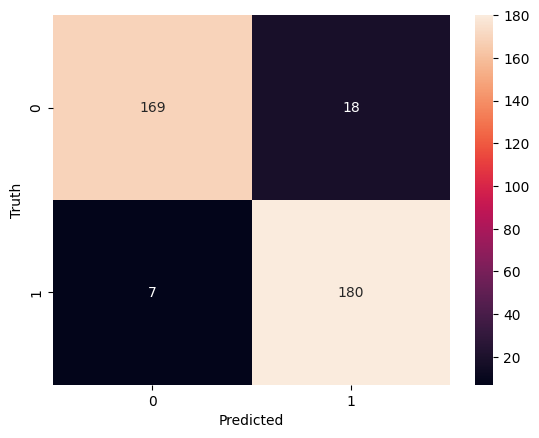

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm , annot = True , fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [86]:
print(classification_report(y_test , y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       187
           1       0.91      0.96      0.94       187

    accuracy                           0.93       374
   macro avg       0.93      0.93      0.93       374
weighted avg       0.93      0.93      0.93       374



In [83]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]

model.predict(reviews)



1/1 [==============================] - 2s 2s/step


array([[0.7376013 ],
       [0.8158053 ],
       [0.80286574],
       [0.26761538],
       [0.13868743]], dtype=float32)